
# Importing Libraries


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

### Importing dataset

In [5]:
data = pd.read_excel("Patient_Data_New.xlsx")

In [6]:
data.head()

,Name,PRN,age,gender,date of onset,time of onset,date of admission,date of discharge,cell1,cell2,...,MCTA,ecosprine,clopidogril,thrombolysis,thrombolytic agent,anticoagulation,mechanical thrombectomy,decompressive hemicranectomy,MRS,barthel index
0,Prakash Marne,2.300001e+10,51.0,1.0,2023-10-27 00:00:00,06:30:00,2023-10-27,2023-10-31,9.551710e+09,NaN,...,5.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,0,75
1,Santosh nande,2.009006e+08,55.0,1.0,2023-09-11 00:00:00,06:30:00,2023-09-11,2023-10-05,9.890855e+09,NaN,...,4.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,0,85
2,Devka yashoda,2.302051e+08,70.0,2.0,2023-02-26 00:00:00,19:00:00,2023-02-26,2023-02-28,8.888435e+09,NaN,...,NaN,1.0,1.0,2.0,NaN,8.0,NaN,NaN,0,100
3,Shrirang Jadhav 231200200,2.300000e+11,62.0,1.0,2023-12-02 00:00:00,NaN,2023-12-06,2023-12-05,7.588685e+09,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,90
4,Vinod Shinde,2.400000e+11,49.0,1.0,2024-01-12 00:00:00,14:00:00,2024-01-12,2024-01-22,7.741943e+09,9.850170e+09,...,5.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,0,95


In [7]:
data.shape

(181, 51)

In [8]:
data.isna().sum()

Name                              0
PRN                               9
age                               2
gender                            1
date of onset                    62
time of onset                    77
date of admission                 3
date of discharge                32
cell1                            16
cell2                           153
NIHSS                             9
SHT                               5
DM                                5
Alcohol                           5
smoking                           5
tobacco                           5
dyslipidaemia                     5
atrial fibrillation               5
IHD                               5
rheumatic heart disease           5
other risk factors               94
haemoglobin                       9
PCV                              34
MCV                             111
Homocystiene                     25
HbA1C                            43
Cholesterol                      57
LDL cholesterol             

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          181 non-null    object        
 1   PRN                           172 non-null    float64       
 2   age                           179 non-null    float64       
 3   gender                        180 non-null    float64       
 4   date of onset                 119 non-null    object        
 5   time of onset                 104 non-null    object        
 6   date of admission             178 non-null    datetime64[ns]
 7   date of discharge             149 non-null    datetime64[ns]
 8   cell1                         165 non-null    float64       
 9   cell2                         28 non-null     float64       
 10  NIHSS                         172 non-null    float64       
 11  SHT                           17

In [10]:
data.nunique()

Name                            179
PRN                             125
age                              57
gender                            2
date of onset                    97
time of onset                    46
date of admission               144
date of discharge               122
cell1                           156
cell2                            27
NIHSS                            24
SHT                               2
DM                                2
Alcohol                           2
smoking                           2
tobacco                           2
dyslipidaemia                     2
atrial fibrillation               2
IHD                               2
rheumatic heart disease           2
other risk factors               85
haemoglobin                      78
PCV                             112
MCV                              61
Homocystiene                    138
HbA1C                            59
Cholesterol                      82
LDL cholesterol             

### Dropping unnecesaary Features

In [11]:
data.columns

Index(['Name', 'PRN', 'age', 'gender', 'date of onset', 'time of onset',
       'date of admission', 'date of discharge', 'cell1', 'cell2', 'NIHSS',
       'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco', 'dyslipidaemia',
       'atrial fibrillation', 'IHD', 'rheumatic heart disease',
       'other risk factors', 'haemoglobin', 'PCV', 'MCV', 'Homocystiene',
       'HbA1C', 'Cholesterol', 'LDL cholesterol', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'other investigations',
       'Stroke volume', 'MRI Brain', 'CT Angiography', 'V53', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'ecosprine', 'clopidogril',
       'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'barthel index'],
      dtype='object')

In [12]:
#important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
 #      'dyslipidaemia', 'atrial fibrillation', 'IHD',
   #    'rheumatic heart disease', 'haemoglobin', 'PCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'LDL cholesterol',
    #   'HDL Cholesterol', 'Triglycerides', 'V LDL', 'b 12', 'ecosprine',
    #   'clopidogril', 'thrombolysis', 'thrombolytic agent', 'anticoagulation',
     #  'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
    #   'barthel index']

In [13]:
important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
      'dyslipidaemia', 'atrial fibrillation', 'IHD',
      'rheumatic heart disease', 'haemoglobin', 'Homocystiene', 'CT ASPECTS', 'MRS',
       'barthel index']

In [14]:
data = data[important_features]

In [15]:
data.head()

,Name,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS,MRS,barthel index
0,Prakash Marne,2.63467,51.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,16.8,20.36,10.0,0,75
1,Santosh nande,3.51612,55.0,1.0,8.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,13.2,10.90,8.0,0,85
2,Devka yashoda,3.75343,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,29.58,NaN,0,100
3,Shrirang Jadhav 231200200,6.56245,62.0,1.0,5.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,14.5,31.31,9.0,0,90
4,Vinod Shinde,7.38095,49.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,10.4,22.04,9.0,0,95


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     181 non-null    object 
 1   Stroke volume            181 non-null    float64
 2   age                      179 non-null    float64
 3   gender                   180 non-null    float64
 4   NIHSS                    172 non-null    float64
 5   SHT                      176 non-null    float64
 6   DM                       176 non-null    float64
 7   Alcohol                  176 non-null    float64
 8   smoking                  176 non-null    float64
 9   tobacco                  176 non-null    float64
 10  dyslipidaemia            176 non-null    float64
 11  atrial fibrillation      176 non-null    float64
 12  IHD                      176 non-null    float64
 13  rheumatic heart disease  176 non-null    float64
 14  haemoglobin              1

- Storke Volume is Object , we need all the stroke volume as float

In [17]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [18]:
data.loc[:,'Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

## Dealing with NULL values

- Checking Null Stroke Volume

In [19]:
data["Stroke volume"].isna().sum()

0

- Checking NULL MRS value

In [20]:
data['MRS'].isna().sum()

0

In [21]:
data.shape

(181, 19)

### Dropping NULL MRS and NULL Stroke Volume


In [22]:
data.dropna(subset=['MRS'], inplace=True)

In [23]:
data.shape

(181, 19)

In [24]:
data['Stroke volume'].isna().sum()

0

In [25]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [26]:
data.drop(columns=["Name"], inplace=True)

In [27]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS,MRS,barthel index
0,2.63467,51.0,1.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,16.8,20.36,10.0,0,75
1,3.51612,55.0,1.0,8.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,13.2,10.90,8.0,0,85
2,3.75343,70.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,29.58,NaN,0,100
3,6.56245,62.0,1.0,5.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,14.5,31.31,9.0,0,90
4,7.38095,49.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,10.4,22.04,9.0,0,95


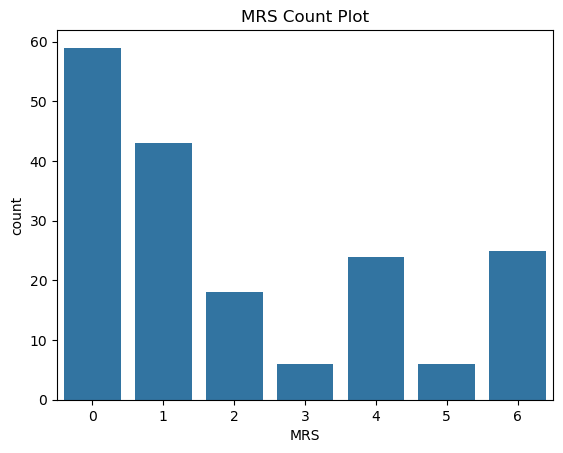

In [28]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [29]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

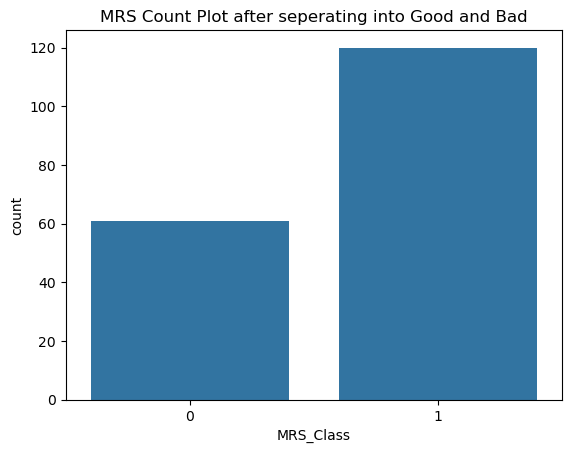

In [30]:
plt.figure()
plt.title('MRS Count Plot after seperating into Good and Bad')
sns.countplot(data=data, x='MRS_Class')
plt.show()

## Ajusting Binary Values

In [31]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [32]:
data.reset_index(inplace=True, drop=True)

In [33]:
data.head()

,Stroke volume,age,gender,NIHSS,SHT,DM,Alcohol,smoking,tobacco,dyslipidaemia,atrial fibrillation,IHD,rheumatic heart disease,haemoglobin,Homocystiene,CT ASPECTS,MRS,barthel index,MRS_Class
0,2.63467,51.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,16.8,20.36,10.0,0,75,1
1,3.51612,55.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.2,10.90,8.0,0,85,1
2,3.75343,70.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,29.58,NaN,0,100,1
3,6.56245,62.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.5,31.31,9.0,0,90,1
4,7.38095,49.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,10.4,22.04,9.0,0,95,1


In [34]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

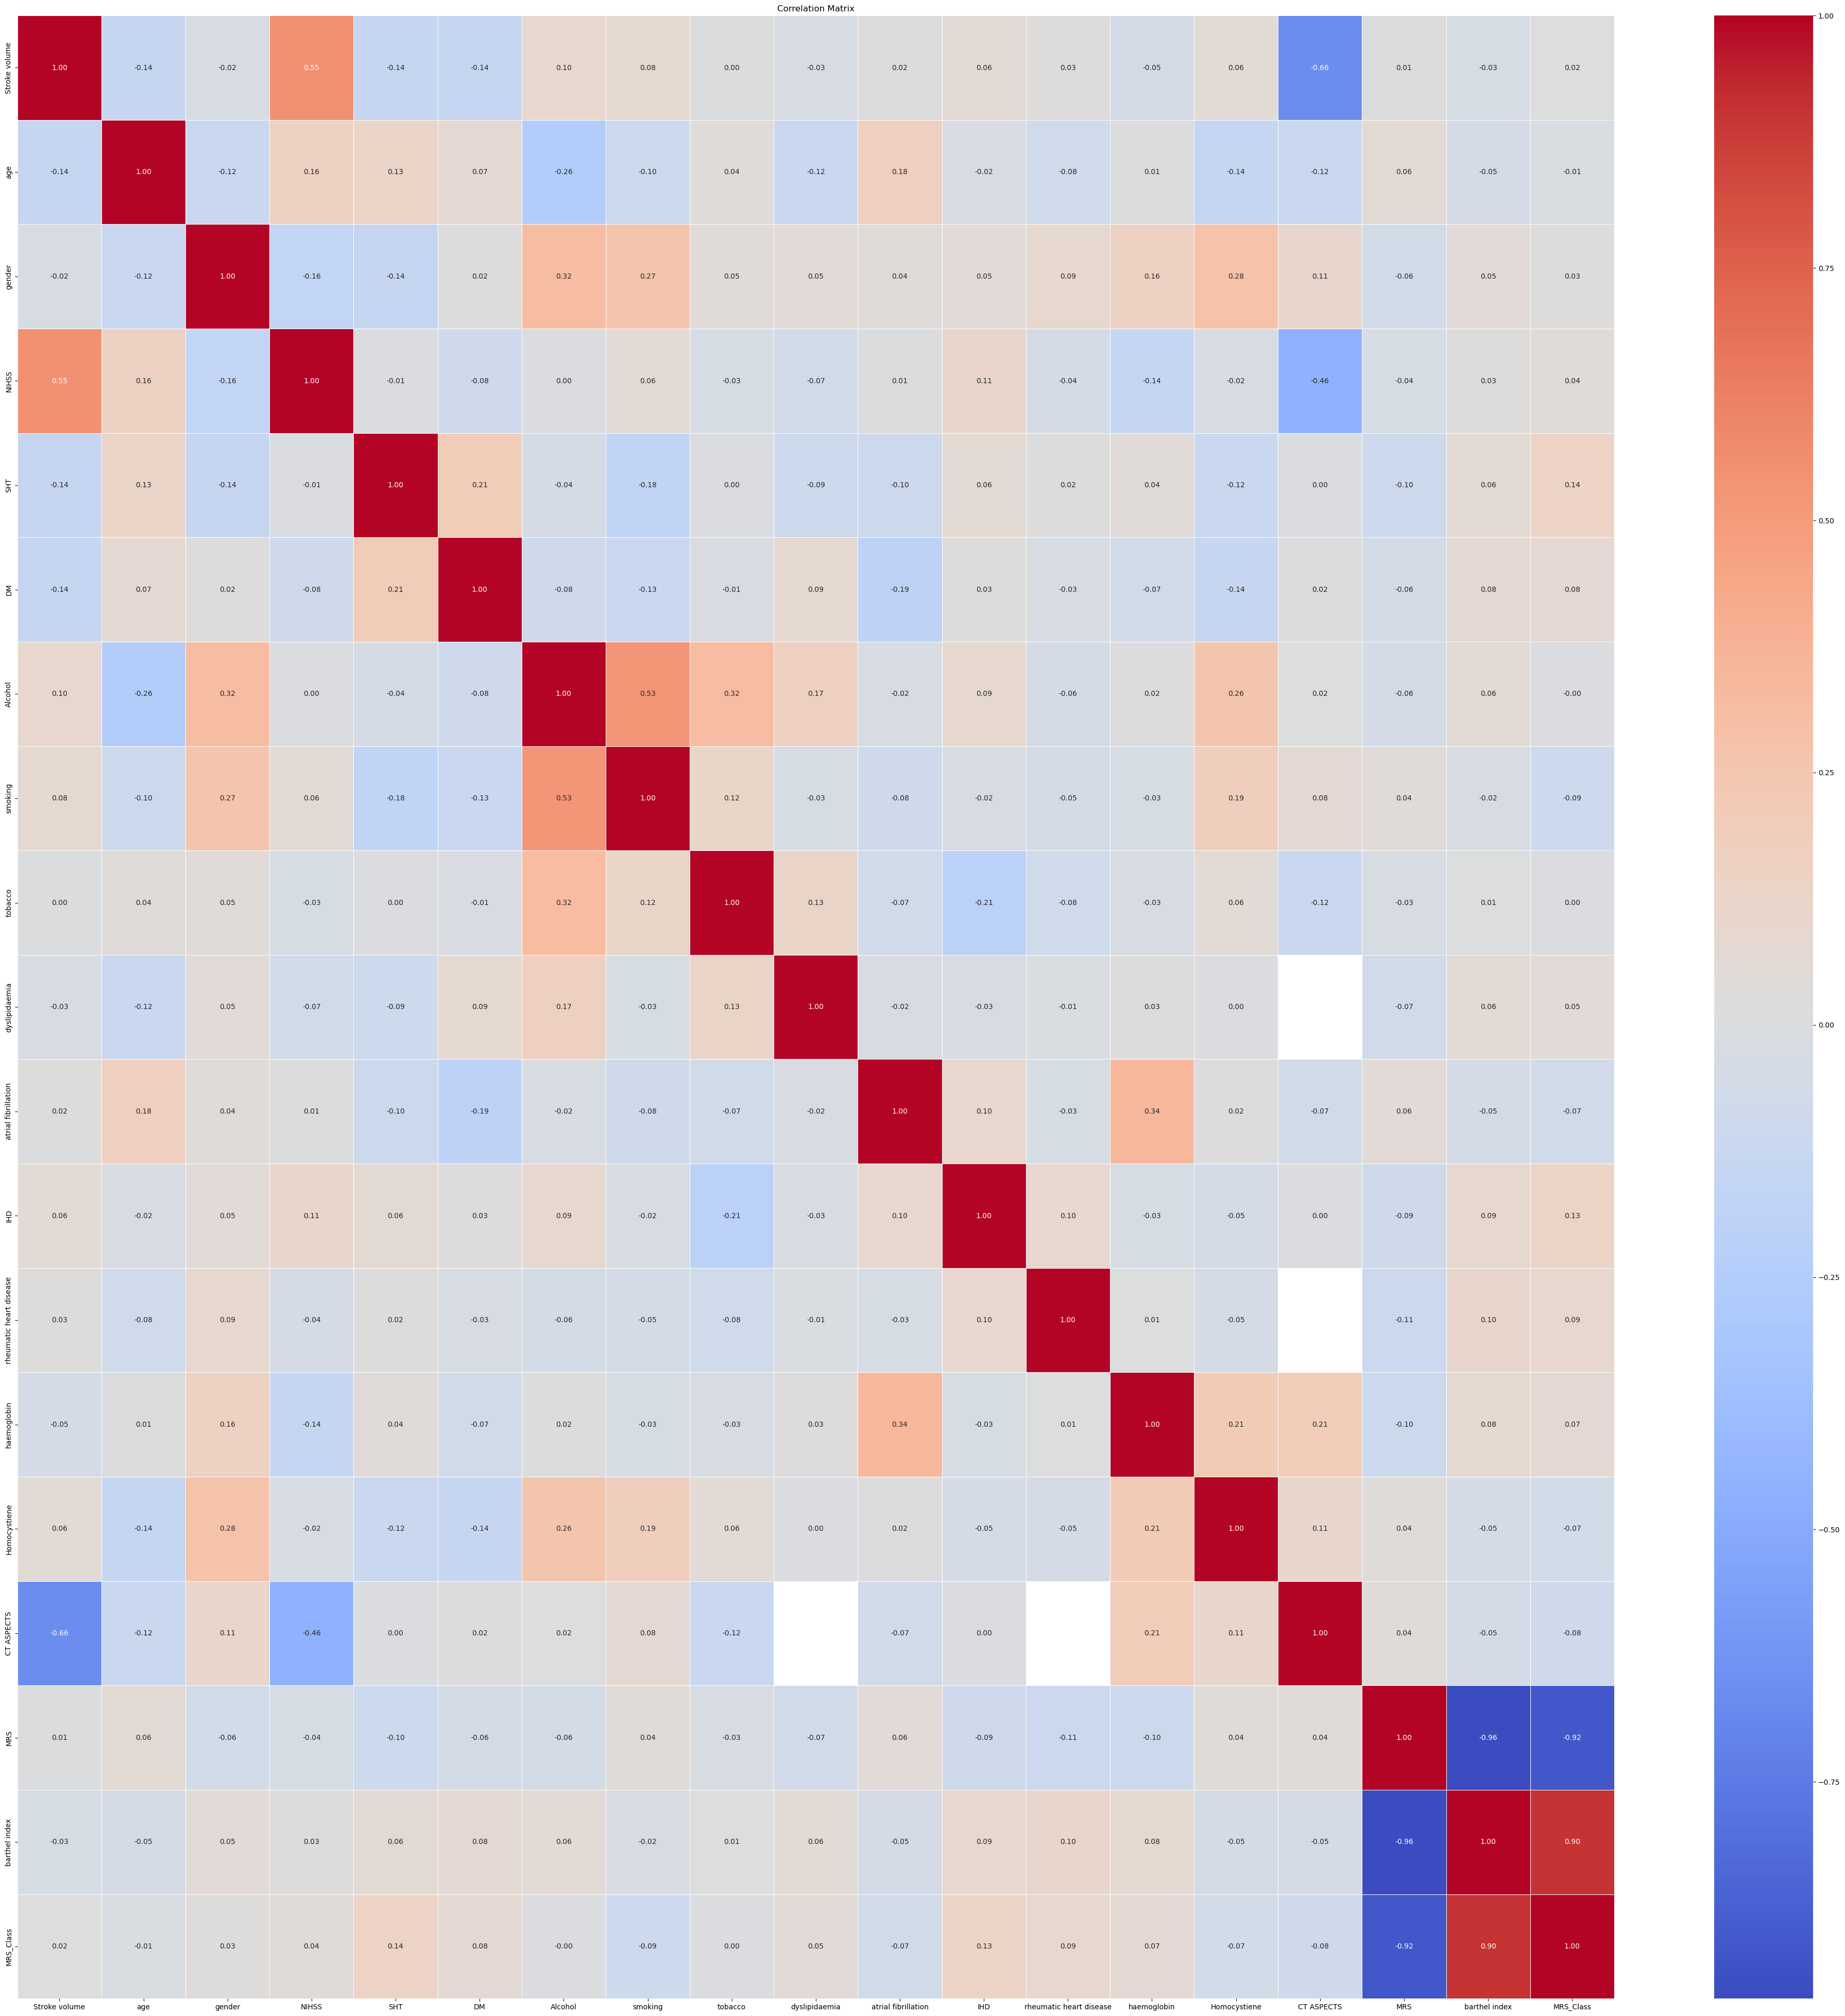

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [36]:
y = data.iloc[:,-1].values
z = data.iloc[:,-2].values
X = data.drop(columns=["MRS","barthel index", "MRS_Class"])
X = X.to_numpy()

In [37]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [38]:
z

array([ 75,  85, 100,  90,  95, 100, 100,  90, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100,  80,  85,  85,  85,  85,
        85,  90,  90,  90,  90,  90,  90,  95,  95,  95,  95,  95,  95,
        95, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        90, 100, 100, 100, 100, 100, 100, 100, 100, 100,  90,  60,  65,
        65,  65,  70,  80,  80,  85,  85,  85,  90,  90,  90,  95,  95,
        85,  85,  80,  60,  60,  60,  65,  70,  75,  15,  15,  20,  25,
        30,  35,  40,  40,  40,  40,  40,  40,  45,  50,  50,  50,  60,
        65,  65,  60,  50,  40,  30,  15,   5,  10,  15,  20,  25,  25,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [39]:
X

array([[  2.63467,  51.     ,   1.     , ...,  16.8    ,  20.36   ,
         10.     ],
       [  3.51612,  55.     ,   1.     , ...,  13.2    ,  10.9    ,
          8.     ],
       [  3.75343,  70.     ,   0.     , ...,  10.7    ,  29.58   ,
              nan],
       ...,
       [108.176  ,  65.     ,   1.     , ...,   9.9    ,       nan,
              nan],
       [117.921  ,  70.     ,   0.     , ...,   8.8    ,   9.48   ,
          3.     ],
       [249.581  ,  50.     ,   0.     , ...,   8.4    ,       nan,
          4.     ]])

## Preprocessing Pipeline

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [43]:
data.isna().sum()

Stroke volume               0
age                         2
gender                      1
NIHSS                       9
SHT                         5
DM                          5
Alcohol                     5
smoking                     5
tobacco                     5
dyslipidaemia               5
atrial fibrillation         5
IHD                         5
rheumatic heart disease     5
haemoglobin                 9
Homocystiene               25
CT ASPECTS                 83
MRS                         0
barthel index               0
MRS_Class                   0
dtype: int64

In [44]:
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')
binary_features = [data.columns.get_loc(feature) for feature in binary_features]
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [45]:
numeric_features = ['Stroke volume', 'age', 'NIHSS', 'haemoglobin', 'Homocystiene', 'CT ASPECTS']
numeric_features = [data.columns.get_loc(feature) for feature in numeric_features]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features),
    ]
)

In [47]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [50]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [51]:
pipeline = Pipeline(
    steps = [('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())]
)

## Cross Validation Pipeline

In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [53]:
# Define parameters for Decision Tree
param1 = {}
param1['classifier__max_depth'] = [3, 5, 10]
param1['classifier__criterion'] = ['gini', 'entropy']
param1['classifier'] = [DecisionTreeClassifier()]

# Define parameters for Random Forest
param2 = {}
param2['classifier__n_estimators'] = [50, 100, 200]
param2['classifier__max_depth'] = [3, 5, 10]
param2['classifier__criterion'] = ['gini', 'entropy']
param2['classifier__bootstrap'] = [True, False]
param2['classifier'] = [RandomForestClassifier()]

# Define parameters for AdaBoost
param3 = {}
param3['classifier__n_estimators'] = [50, 100, 200]
param3['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param3['classifier__estimator'] = [DecisionTreeClassifier(criterion='gini', max_depth = 5), DecisionTreeClassifier(criterion='gini',max_depth=3)]
param3['classifier'] = [AdaBoostClassifier()]

# Define parameters for Gradient Boosting
param4 = {}
param4['classifier__n_estimators'] = [50, 100, 200]
param4['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param4['classifier__max_depth'] = [3, 5, 10]
param4['classifier'] = [GradientBoostingClassifier()]

# Define parameters for XGBClassifier
param5 = {}
param5['classifier__n_estimators'] = [50, 100, 200]
param5['classifier__max_depth'] = [3, 5, 10]
param5['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param5['classifier'] = [XGBClassifier()]

# Define parameters for LGBMClassifier
param6 = {}
param6['classifier__n_estimators'] = [50, 100, 200]
param6['classifier__max_depth'] = [3, 5, 10]
param6['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param6['classifier'] = [LGBMClassifier()]

# Define parameters for Bagging Classifier (Example with Decision Tree)
param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100]
param7['classifier__estimator'] = [DecisionTreeClassifier(criterion='gini', max_depth = 5), LogisticRegression(C = 0.1, penalty='l1', solver='liblinear')]
param7['classifier'] = [BaggingClassifier()]

In [54]:
params = [param1, param2, param3, param4, param5, param6, param7]

In [55]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [56]:
grid = GridSearchCV(pipeline, params, cv=cv, scoring='accuracy', verbose=2).fit(X, y)

Fitting 10 folds for each of 147 candidates, totalling 1470 fits
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time

KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)

{'classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), 'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


In [ ]:
print(grid.best_score_)

0.9064327485380117


In [ ]:
means = np.round_(grid.cv_results_['mean_test_score'], 6)
params_summary = grid.cv_results_['params']

In [ ]:
df = pd.DataFrame(list(zip(means, params_summary)), columns=['Mean Score', 'Parmeters'])
df = df.sort_values(by = 'Mean Score', ascending=False)

In [ ]:
from datetime import datetime
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'Results-'+ current_datetime +'.csv'
df.to_csv(result_filename, index=False)

In [ ]:
# CART, PERT, Random Forest Bagging & Boosting(Entropy or Gini indix), SVM(All Kernels), K_Folds

In [ ]:
#logistic regression, Naive Bayes